# Analyze a BigDFT run

In this example we will inspect how the BigDFT python library can be used to retrieve the results from a run.

As a first operation we have to be sure that the path for the BigDFT scripts is present in the PYTHONPATH.
If not so, this might be updated by the script in the following way:

In [1]:
#write here the position of the BigDFT installation (usually <buildtree>/install/lib/pythonX.X/site-packages)
import os
BIGDFT_PYTHONDIR=os.path.abspath(
    os.path.join(os.pardir,os.pardir,'src','python')
    ) #refer to the sources, only for test 
#then update the path
import sys
if BIGDFT_PYTHONDIR not in sys.path: 
    sys.path+=[BIGDFT_PYTHONDIR]

Now we can load the Logfiles module:

In [2]:
from BigDFT import Logfiles as lf 
#for interactive plots remove the following line
%matplotlib inline 

Let us now load a file into a instance of a Logfile class. Imagine that our logfile corresponds to a single-point run, and it is present in a file named "log-HBDMI.yaml":


In [3]:
HBDMI=lf.Logfile('testfiles/log-HBDMI.yaml')

The run is now loaded. To inspect its behaviour we might print it down to inspect the usual information:

In [4]:
print HBDMI
#HBDMI.geopt_plot()

- Atom types:
  - C
  - H
  - N
  - O
- Cell: Free BC
- Convergence criterion on forces: 0.0
- Symmetry group: disabled
- Energy: -127.35074499502582
- fermi_level: -0.1921099447862
- Max val of Forces: 0.01730347812308
- Number of Atoms: 28
- No. of KS orbitals per k-point:
  - 41
  - 0



The above information can also be accessed separately, by having a look at the attributes of the HBDMI object:

In [5]:
HBDMI.__dict__.keys() #you may also type: dir(HBDMI)

['evals',
 'forcemax_cv',
 'log',
 'symmetry',
 'energy',
 'label',
 'forcemax',
 'fermi_level',
 'forces',
 'nat',
 'astruct']

For this reason, we might consider to postprocess some of the variables for study of the system. Here an example:

In [6]:
print 'The average energy per atom is:',HBDMI.energy/HBDMI.nat,\
    '(',HBDMI.energy,' Ha),',HBDMI.nat,' atoms)'
print 'There are also,',HBDMI.evals[0].info,' (up,down) orbitals in the run'

The average energy per atom is: -4.54824089268 ( -127.350744995  Ha), 28  atoms)
There are also, [41, 0]  (up,down) orbitals in the run


We might access the Density of States of this system (note that if the matplotlib inlining is deactivated, the RadioButton widget below allows to adjust the smearing):

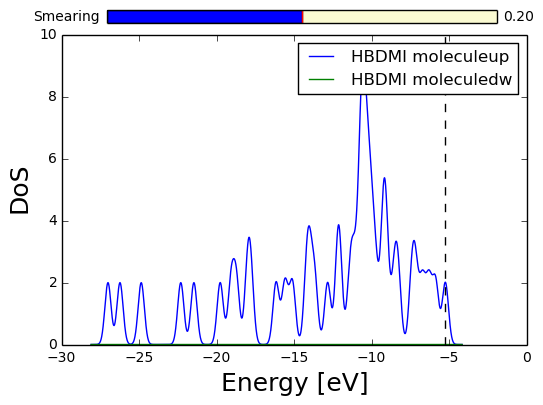

In [7]:
HBDMIDos=HBDMI.get_dos(label='HBDMI molecule')
HBDMIDos.plot(sigma=0.2)

## Case of a periodic system

The above case was a Free BC molecule single point run. Let us now consider the case of a periodic calculation.
We take as an example a logfile coming from one run of the DeltaTest benchmark (see [this page](https://molmod.ugent.be/deltacodesdft) to know what it is all about). In any case, let us load the "log-K-1.0.yaml" file:

In [8]:
K=lf.Logfile('testfiles/log-K.yaml')
print K

- Atom types:
  - K
- Cell:
  - 9.98888442684
  - 9.98888442684
  - 9.98888442684
- Convergence criterion on forces: 0.0
- Symmetry group: not prim.
- Energy: -56.52301363451743
- fermi_level: 0.0609691899665294
- Max val of Forces: 2.038812434232e-07
- Number of Atoms: 2
- kpt_mesh:
  - 15
  - 15
  - 15
- No. of KS orbitals per k-point:
  - 13
  - 0



Here we can see that there are also other attributes available, like the k-points and the pressure (in GPa):

In [9]:
dir(K)

['__doc__',
 '__getitem__',
 '__init__',
 '__module__',
 '__str__',
 '_get_bz',
 '_initialize_class',
 '_print_information',
 'astruct',
 'energy',
 'evals',
 'fermi_level',
 'forcemax',
 'forcemax_cv',
 'geopt_plot',
 'get_brillouin_zone',
 'get_dos',
 'kpt_mesh',
 'kpts',
 'label',
 'log',
 'nat',
 'nkpt',
 'symmetry']

Here we might trace the density of states but also the band structure plot, in a similar fashion (sse also the Band Structure notebook):

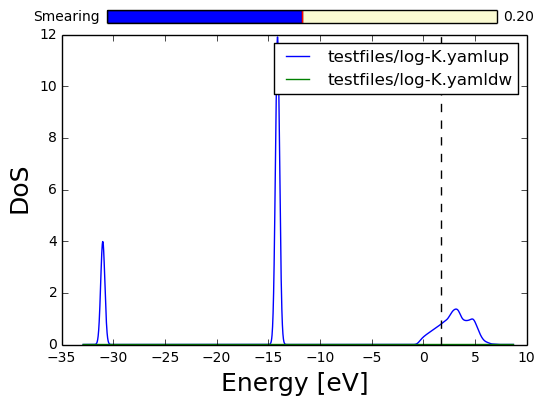

lattice [[ 9.98888443  0.          0.        ]
 [ 0.          9.98888443  0.        ]
 [ 0.          0.          9.98888443]]
spacegroup Im-3m (229)
Lattice found: cubic
irreductible k-points 120
Interpolation bias 2.38385636069e-09


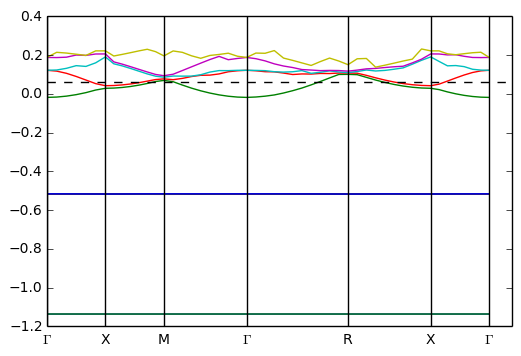

In [10]:
K.get_dos().plot()
K.get_brillouin_zone().plot()

As another example for the system we might inspect the kpoints:

In [11]:
print K.kpts[0]
print K.kpts[-1]

{'Wgt': 0.0003, 'Bz': [0.0, 0.0, 0.0], 'Rc': [0.0, 0.0, 0.0]}
{'Wgt': 0.0024, 'Bz': [0.2935, 0.2935, 0.2935], 'Rc': [0.4667, 0.4667, 0.4667]}


## Case of a Geometry optimization

For a geometry optimization the situation is similar, with the extra point that the code automatically recognize  multiple runs inside the logfile. Let us see the example of the following logfile:

In [12]:
geopt=lf.Logfile('testfiles/GEOPT-all_sqnmbiomode.out.ref.yaml')
print geopt

Found 11 different runs
- Atom types:
  - C
  - H
- Cell: Free BC
- Convergence criterion on forces: 0.01
- Symmetry group: disabled
- Energy: -14.900068217309986
- fermi_level: -0.2935133380623
- Threshold fluctuation of Forces: 0.000771111
- Max val of Forces: 0.00376314
- Number of Atoms: 8
- No. of KS orbitals per k-point:
  - 7
  - 0



The interesting point is that now the logfile can be iterated among the different geometry steps:

In [13]:
en=[l.energy for l in geopt]
for i,e in enumerate(en):
    print i,e

0 -14.8960952539
1 -14.8973771723
2 -14.8984824334
3 -14.8988612802
4 -14.8992643257
5 -14.8995896652
6 -14.8996942689
7 -14.8997814206
8 -14.8998305686
9 -14.8999870545
10 -14.9000682173


The geopt_plot() function allows to plot the relation beween energy and forces, where it can be also seen that the desired criterion is reached. Errorbars show the local fluctuation of the forces, an indication of the (cleaned) center of mass drift. See the example:

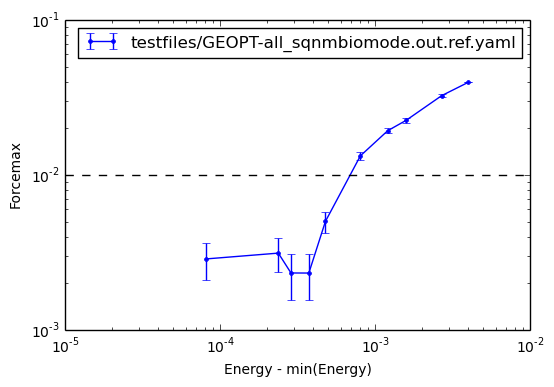

In [14]:
geopt.geopt_plot()